# Netflix Daily Top 10 EDA

### Objetivos

- Extrair tipos de dados disponíveis
- Extrair período da análise feita
- Extrair tamanho da base de dados
- Verificar dados nulos
- Extrair outliers

#### Importação dependências 

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Criação do DataFrame

In [41]:
df_netflix_daily_top_10 = pd.read_csv('./datasets/netflix daily top 10.csv')

df_netflix_daily_top_10

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


#### Normalização dos dados

In [42]:
df_netflix_daily_top_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [43]:
normalized_df = df_netflix_daily_top_10.copy()

cols_to_numeric = ['Year to Date Rank', 'Last Week Rank']
for col in cols_to_numeric:
    normalized_df[col] = pd.to_numeric(normalized_df[col], errors='coerce').fillna(0)

normalized_df['Netflix Exclusive'] = normalized_df['Netflix Exclusive'].fillna('No')

normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   As of                 7100 non-null   object 
 1   Rank                  7100 non-null   int64  
 2   Year to Date Rank     7100 non-null   float64
 3   Last Week Rank        7100 non-null   float64
 4   Title                 7100 non-null   object 
 5   Type                  7100 non-null   object 
 6   Netflix Exclusive     7100 non-null   object 
 7   Netflix Release Date  7100 non-null   object 
 8   Days In Top 10        7100 non-null   int64  
 9   Viewership Score      7100 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 554.8+ KB


In [44]:
df_netflix_daily_top_10 = normalized_df

### Extrair tipos de dados disponíveis

In [45]:
df_netflix_daily_top_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   As of                 7100 non-null   object 
 1   Rank                  7100 non-null   int64  
 2   Year to Date Rank     7100 non-null   float64
 3   Last Week Rank        7100 non-null   float64
 4   Title                 7100 non-null   object 
 5   Type                  7100 non-null   object 
 6   Netflix Exclusive     7100 non-null   object 
 7   Netflix Release Date  7100 non-null   object 
 8   Days In Top 10        7100 non-null   int64  
 9   Viewership Score      7100 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 554.8+ KB


### Extrair período da análise feita

In [46]:
df_netflix_daily_top_10['As of'] = pd.to_datetime(df_netflix_daily_top_10['As of'], errors='coerce')

data_min = df_netflix_daily_top_10['As of'].min()
data_max = df_netflix_daily_top_10['As of'].max()

print(f"Os dados abrangem o período de {data_min.date()} até {data_max.date()}")

Os dados abrangem o período de 2020-04-01 até 2022-03-11


### Extrair tamanho da base de dados

In [47]:
num_linhas, num_colunas = df_netflix_daily_top_10.shape

print(f"A base de dados contém {num_linhas} linhas e {num_colunas} colunas.")

A base de dados contém 7100 linhas e 10 colunas.


### Verificar dados nulos

In [48]:
nulls = df_netflix_daily_top_10.isnull().sum()

nulls

As of                   0
Rank                    0
Year to Date Rank       0
Last Week Rank          0
Title                   0
Type                    0
Netflix Exclusive       0
Netflix Release Date    0
Days In Top 10          0
Viewership Score        0
dtype: int64

### Extrair outliers

##### Usando metododo IQR (Interquartile Range)

In [49]:
numerics = df_netflix_daily_top_10.select_dtypes(include=['float64', 'int64'])

Q1 = numerics.quantile(0.25)
Q3 = numerics.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numerics < (Q1 - 1.5 * IQR)) | (numerics > (Q3 + 1.5 * IQR)))

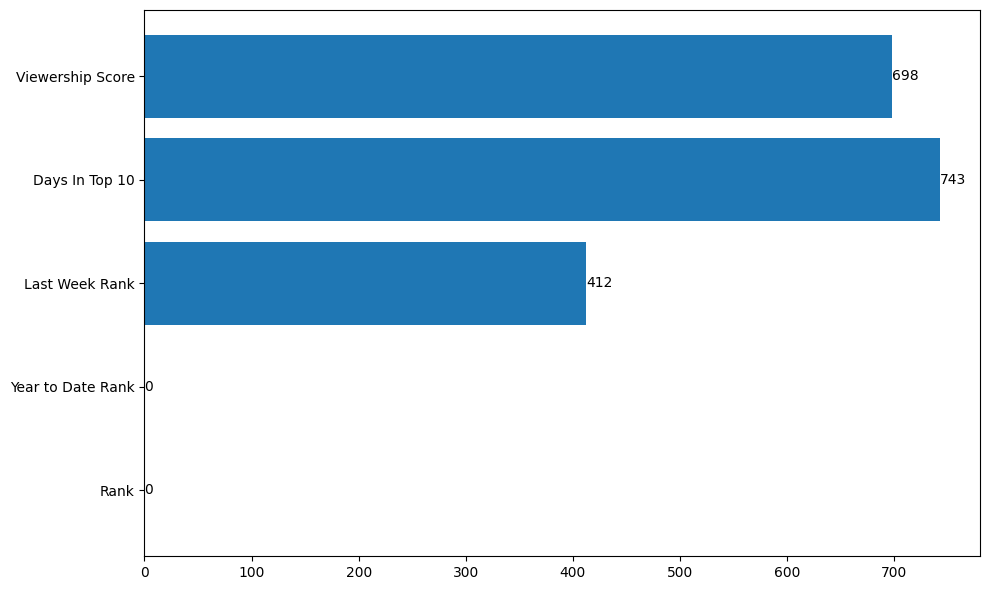

In [50]:
outliers_count = outliers.sum()

plt.figure(figsize=(10, 6))
bars = plt.barh(outliers_count.index, outliers_count.values)

for bar in bars:
    xval = bar.get_width() 
    plt.text(xval + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{int(xval)}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

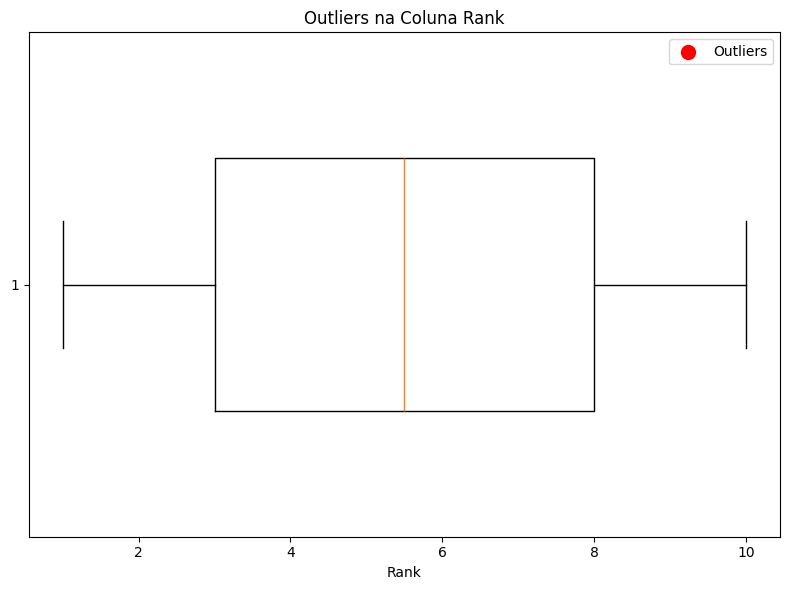

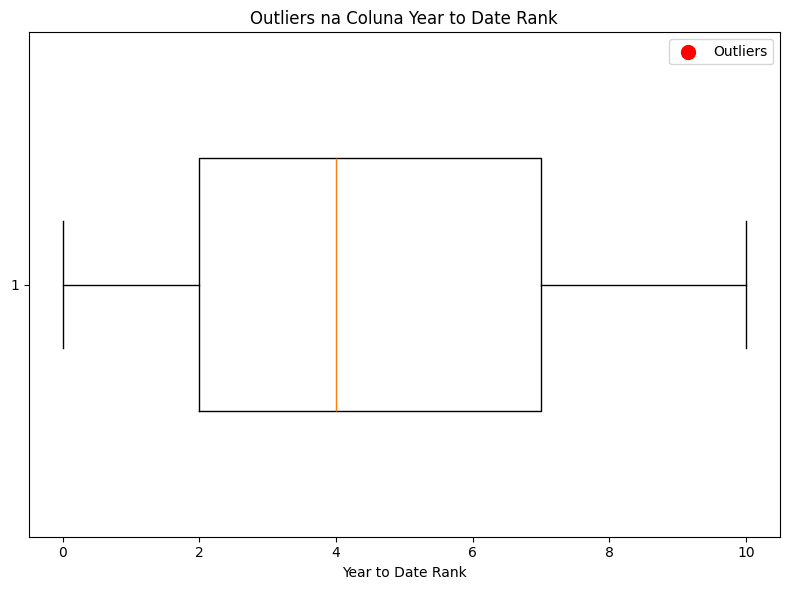

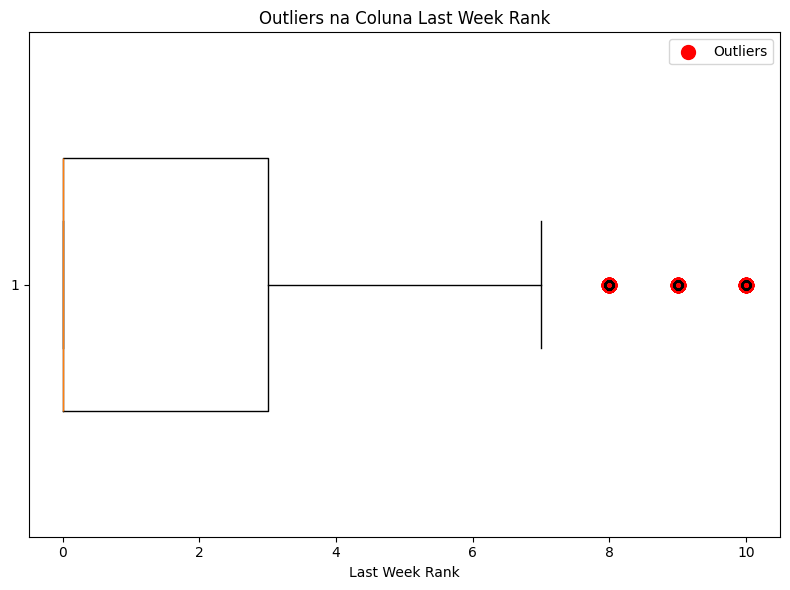

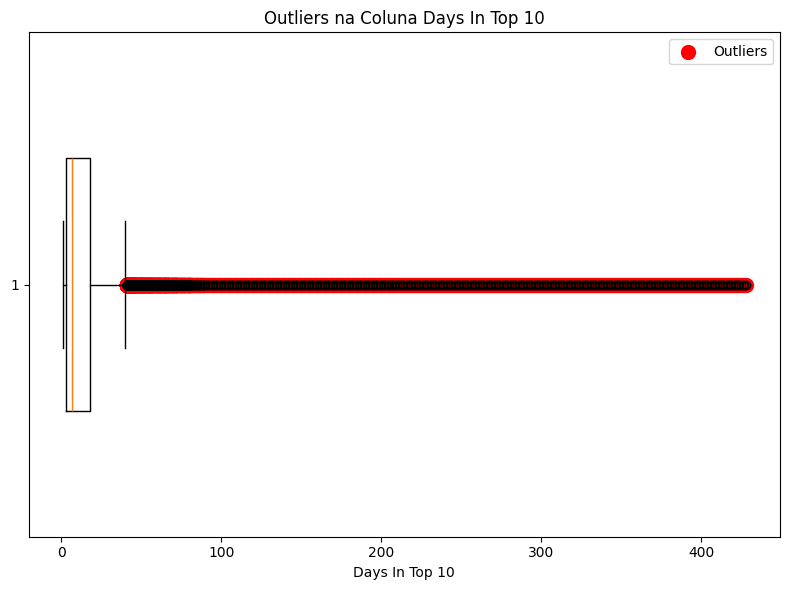

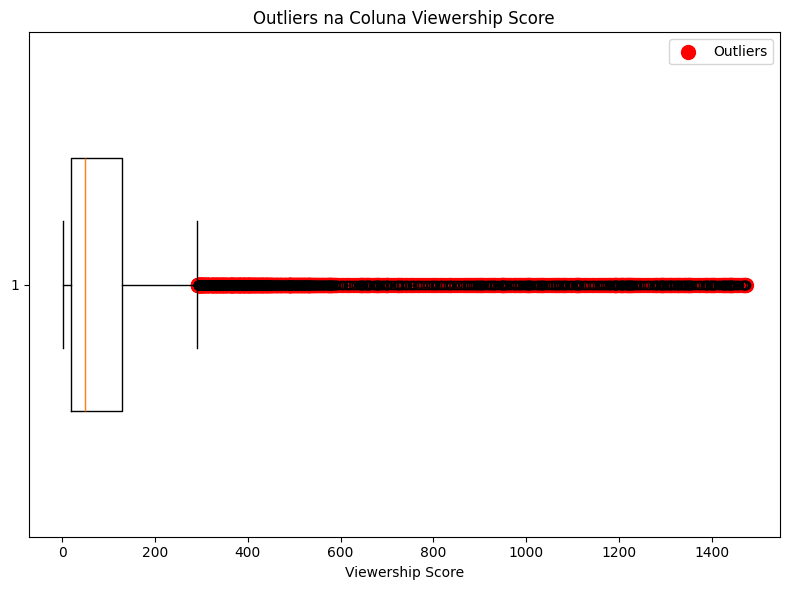

In [51]:
for col in numerics.columns:
    plt.figure(figsize=(8, 6))
    
    plt.boxplot(df_netflix_daily_top_10[col], vert=False, positions=[1], widths=0.5)
    
    outliers_col = df_netflix_daily_top_10[outliers[col]]
    
    plt.scatter(outliers_col[col], [1] * len(outliers_col), color='red', label='Outliers', s=100)
    
    plt.title(f'Outliers na Coluna {col}')
    plt.xlabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()